In [ ]:
#importing pandas, numpy
import pandas as pd
import numpy as np
output_path = '/Users/venkatm/Desktop/utm_shared/cleaned_files_latest/'


In [ ]:
#(1) Data cleaning for customers.csv
#read .csv file and converting datatypes
df_customers= pd.read_csv(r"/Users/venkatm/Documents/DIVYA/Ratails Analytics/customers.csv",
                 dtype={'customer_id': 'string',
                        'first_name': 'string', 
                        'last_name': 'string',
                        'gender': 'string',
                        'age':'float64',
                       'region': 'string'},parse_dates =['signup_date'])

#print null values in the entire table
print(df_customers.isnull().sum())

# calculating mean for age column
mean_age = df_customers['age'].mean().round(0)
print(mean_age)

#replace mean value with NA
df_customers['age'] = df_customers['age'].fillna(mean_age)

#converting the datatype if age coulumn from float to int
df_customers["age"] = df_customers["age"].astype(int)

df_customers.info()

# creating age_group column
df_customers['age_group'] = np.where(df_customers['age'] < 18, 'Youth',
                                np.where(df_customers['age'] < 40, 'Adult', 'Senior'))

print(df_customers.describe())

print(df_customers)



In [ ]:
#REMOVING DUPLICATES

#print total duplicate rows
print(df_customers.duplicated().sum())

#duplicate rows in the dataframe, excluding the first occurrence.
df_customers.loc[df_customers.duplicated()]

#drop duplicates
df_customers.drop_duplicates(inplace=True)

#check for zero duplicates
print(df_customers.duplicated().sum())

#save the cleaned dataset
df_customers.to_csv(output_path + 'customers_cleaned.csv', index=False)

In [ ]:
#(2) Data cleaning for products.csv
#read csv file and converting datatypes
df_products = pd.read_csv(r"/Users/venkatm/Documents/DIVYA/Ratails Analytics/products.csv",
                         dtype={'product_id':'string' ,
                                'product_name': 'string',
                                'category': 'string',
                               'brand': 'string'})
#print null values in the entire table
print(df_products.isnull().sum())

#replace Brand_Unknown with NA
df_products=df_products.fillna('Brand_Unknown')

#check for zero nulls
print(df_products.isnull().sum())

#derive estimated profit column for for each product if sale is done 
df_products['profit'] = df_products['unit_price'] - df_products['cost_price']

print(df_products)
print('count : ',df_products.count())

In [ ]:
#REMOVING DUPLICATES
#print total duplicate rows
print(df_products.duplicated().sum())

#duplicate rows in the dataframe, excluding the first occurrence.
df_products.loc[df_products.duplicated()]

#drop duplicates
df_products.drop_duplicates(inplace=True)

#check for zero duplicates
print(df_products.duplicated().sum())

df_products.loc[df_products.duplicated(subset = 'product_id')]

#save the cleaned dataset
df_products.to_csv(output_path + 'products_cleaned.csv', index=False)

In [ ]:
#(3) Data cleaning for returns.csv
df_returns =  pd.read_csv(r"/Users/venkatm/Documents/DIVYA/Ratails Analytics/returns.csv",
                          dtype={'return_id':'string' ,
                                'order_id': 'string',
                               'return_reason': 'string'},parse_dates =['return_date'])

#print null values in the entire table
print(df_returns.isnull().sum())

df_returns.info()

print(df_returns)
 

In [ ]:
#REMOVING DUPLICATES
#print total duplicate rows
print(df_returns.duplicated().sum())

#duplicate rows in the dataframe, excluding the first occurrence.
df_returns.loc[df_returns.duplicated()]

#drop duplicates
df_returns.drop_duplicates(inplace=True)

#check for zero duplicates
print(df_returns.duplicated().sum())

df_returns.loc[df_returns.duplicated(subset = 'return_id')]

#save the cleaned dataset
df_returns.to_csv(output_path + 'returns_cleaned.csv', index=False)

In [ ]:
#(4) Data cleaning for sales_data.csv
df_sales =  pd.read_csv(r"/Users/venkatm/Documents/DIVYA/Ratails Analytics/sales_data.csv",
                            dtype={'order_id': 'string',
                                   'customer_id': 'string',
                                   'product_id': 'string',
                                   'store_id': 'string',
                                   'sales_channel': 'string'},parse_dates =['order_date'])
df_sales.info()

#print null values in the entire table
print(df_sales.isnull().sum())

#replace online_store with NA
df_sales['store_id'] = df_sales['store_id'].fillna('online_store')

print(df_sales) 


In [ ]:
#REMOVING DUPLICATES
#print total duplicate rows
print(df_sales.duplicated().sum())

#duplicate rows in the dataframe, excluding the first occurrence.
print(df_sales.loc[df_sales.duplicated()])

# #drop duplicates
df_sales.drop_duplicates(inplace=True)

# #check for zero duplicates
print(df_sales.duplicated().sum())

# #save the cleaned dataset
df_sales.to_csv(output_path + 'sales_cleaned.csv', index=False)

In [ ]:
#(5) Data cleaning for stores.csv
df_stores =  pd.read_csv(r"/Users/venkatm/Documents/DIVYA/Ratails Analytics/stores.csv",
                        dtype={'store_id': 'string',
                                   'store_name': 'string',
                                   'store_type': 'string',
                                   'region': 'string',
                                   'city': 'string'})

#print null values in the entire table
print(df_stores.isnull().sum())

df_stores.info()

print(df_stores) 

In [ ]:
#REMOVING DUPLICATES
# #print total duplicate rows
print(df_stores.duplicated().sum())

#duplicate rows in the dataframe, excluding the first occurrence.
df_stores.loc[df_stores.duplicated()]

#drop duplicates
df_stores.drop_duplicates(inplace=True)

#check for zero duplicates
print(df_stores.duplicated().sum())

#save the cleaned dataset
df_stores.to_csv(output_path + 'stores_cleaned.csv', index=False)

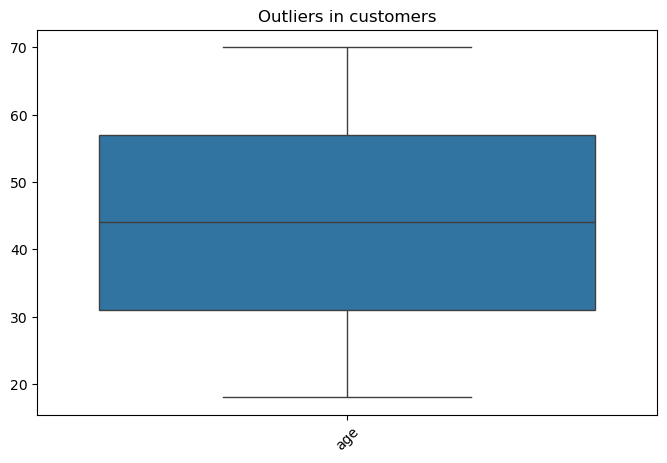

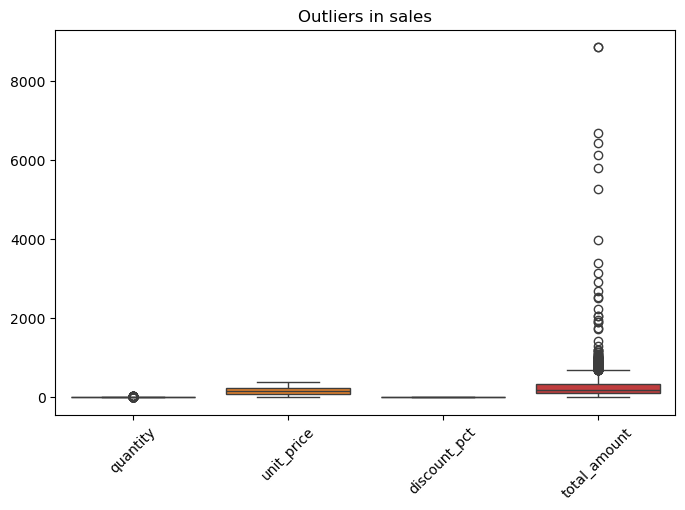

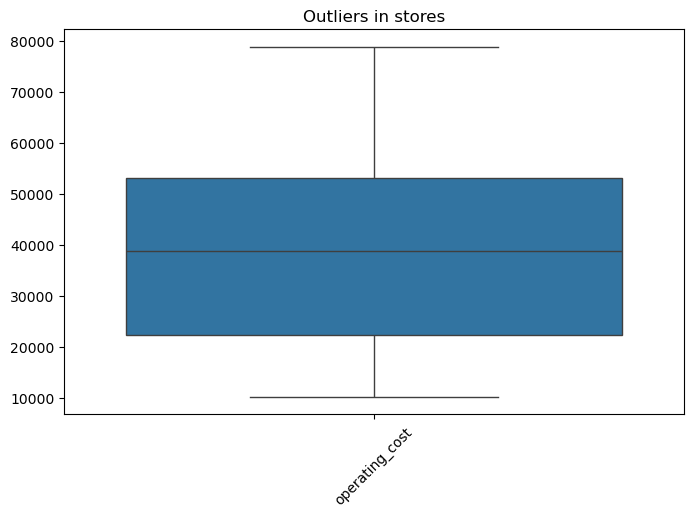

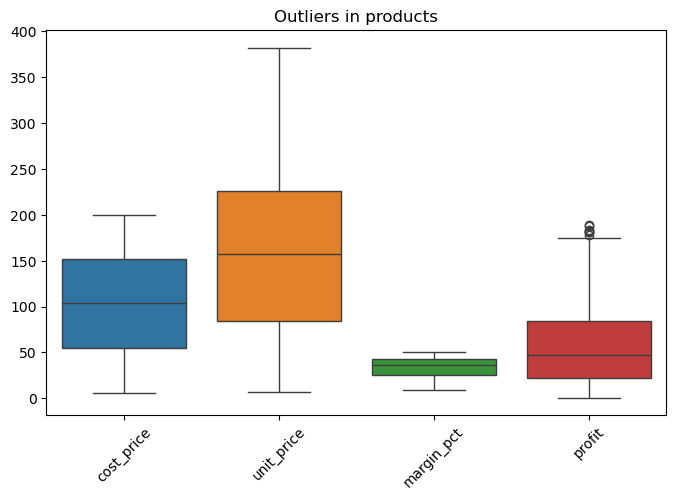

In [20]:
# create outliers
#import matplotlip and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

output_path = '/Users/venkatm/Desktop/utm_shared/cleaned_files_latest/' 

#Again read .csv files to continue EDA using matplotlib and seaborn
df_customers = pd.read_csv(output_path + 'customers_cleaned.csv')
df_returns = pd.read_csv(output_path + 'returns_cleaned.csv')
df_sales = pd.read_csv( output_path +  'sales_cleaned.csv')
df_stores = pd.read_csv(output_path +  'stores_cleaned.csv')
df_products = pd.read_csv( output_path +  'products_cleaned.csv')

#managing all in one dataframe using dictionary
dfs = {
    "customers": df_customers,
    "returns": df_returns,
    "sales": df_sales,
    "stores": df_stores,
    "products": df_products
}

#Loops through your dictionary of dataFrames
for name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=["number"]).columns.   #Picks out only numeric columns from the current DataFrame.
    if not numeric_cols.empty:                                     #Checks if there are any numeric columns.
        plt.figure(figsize=(8, 5))                                 #figsize=(8, 5) means sets the width = 8 inches, height = 5 inches.
        sns.boxplot(data=df[numeric_cols])                         #Creates a boxplot for all numeric columns in that dataframe.
        plt.title(f"Outliers in {name}")                           #title with the current dataframe’s name. ex:outliers in customers..
        plt.xticks(rotation=45)                                    #Rotates the x-axis labels (column names) by 45° for readability.
        plt.show()                                                 #display the plots


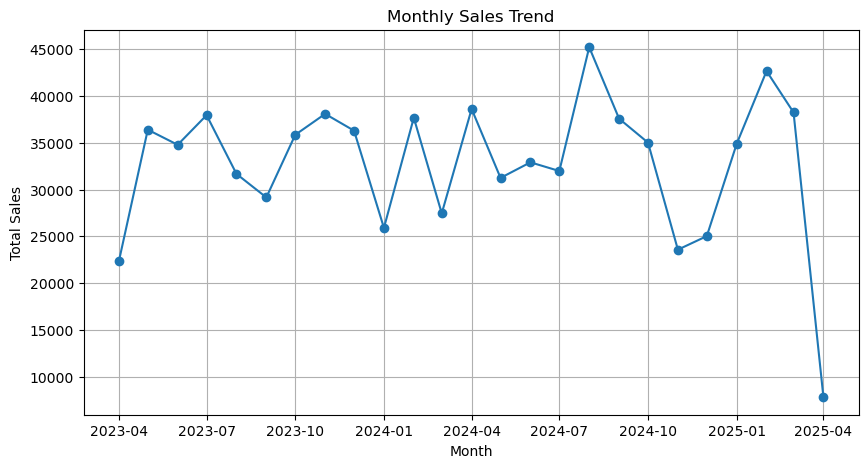

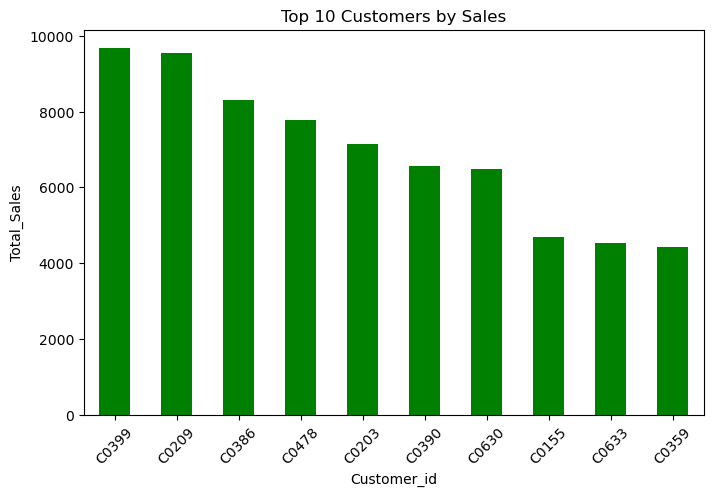

In [23]:
#Converts the order_date column into datetime.
df_sales["order_date"] = pd.to_datetime(df_sales["order_date"], errors="coerce")

# ---- Sales Trend ----
#Group sales by month to get total monthly sales
sales_trend = df_sales.groupby(df_sales["order_date"].dt.to_period("M"))["total_amount"].sum().reset_index() #order_date is still a Period object (Period[M]).

#converts Period[M] into a datetime (Timestamp) as it is Useful for plotting with Matplotlib or Seaborn (which expect real datetime, not Periods). 
sales_trend["order_date"] = sales_trend["order_date"].dt.to_timestamp()


plt.figure(figsize=(10,5))                                                  #figsize=(10, 5) means sets the width = 10inches,height = 5 nches.              
plt.plot(sales_trend["order_date"], sales_trend["total_amount"], marker="o")#Plot a time series line chart of sales per month.
plt.title("Monthly Sales Trend")                                            #the chart title
plt.xlabel("Month")                                                         #label x-axis   
plt.ylabel("Total Sales")                                                   #label x-axis
plt.grid(True)                                                              #Adds grid lines,helps visually align points with axis values.
plt.show()                                                                  #display plot


# ---- Top Customers ----
#Group sales by customer to get total sales per customer and sort customers by sales in descending
top_customers = df_sales.groupby("customer_id")["total_amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))                       #figsize=(8, 5) means sets the width = 8inches,height = 5 nches. 
top_customers.plot(kind="bar", color="green")  #bar chart and bars are green in color
plt.title("Top 10 Customers by Sales")         #chart title
plt.xlabel("Customer_id")                      #label x-axis 
plt.ylabel("Total_Sales")                      #label y-axis 
plt.xticks(rotation=45)                        #Rotates the customer_ids by 45° to avoid overlap.
plt.show()                                     # show plot